# Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import plotly.express as px
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.compose import ColumnTransformer
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Import file

In [2]:
immo_df = pd.read_csv("data/immo.csv")
immo_df.head()

Unnamed: 0  longitude  latitude  housing_median_age  total_rooms  \
0        2072    -119.84     36.77                 6.0       1853.0   
1       10600    -117.80     33.68                 8.0       2032.0   
2        2494    -120.19     36.60                25.0        875.0   
3        4284    -118.32     34.10                31.0        622.0   
4       16541    -121.23     37.79                21.0       1922.0   

   total_bedrooms  population  households  median_income  median_house_value  \
0           473.0      1397.0       417.0         1.4817             72000.0   
1           349.0       862.0       340.0         6.9133            274100.0   
2           214.0       931.0       214.0         1.5536             58300.0   
3           229.0       597.0       227.0         1.5284            200000.0   
4           373.0      1130.0       372.0         4.0815            117900.0   

  ocean_proximity  
0          INLAND  
1       <1H OCEAN  
2          INLAND  
3       <1H OCEAN  
4          INLAND

# Data exploration

## First data exploration

In [3]:
immo_df.describe()

Unnamed: 0     longitude      latitude  housing_median_age  \
count  16512.000000  16512.000000  16512.000000        16512.000000   
mean   10295.498789   -119.564046     35.626523           28.624516   
std     5941.973488      2.005033      2.139150           12.597980   
min        0.000000   -124.350000     32.540000            1.000000   
25%     5178.750000   -121.790000     33.930000           18.000000   
50%    10263.500000   -118.490000     34.250000           29.000000   
75%    15438.250000   -118.010000     37.710000           37.000000   
max    20639.000000   -114.310000     41.950000           52.000000   

        total_rooms  total_bedrooms    population    households  \
count  16512.000000    16336.000000  16512.000000  16512.000000   
mean    2644.170603      539.319540   1435.017260    501.135962   
std     2213.946369      425.207704   1158.151967    385.650673   
min        6.000000        2.000000      3.000000      2.000000   
25%     1446.000000      296.000000    788.000000    280.000000   
50%     2116.000000      435.000000   1168.000000    410.000000   
75%     3154.000000      647.000000   1738.000000    606.000000   
max    39320.000000     6445.000000  35682.000000   6082.000000   

       median_income  median_house_value  
count   16512.000000        16512.000000  
mean        3.864091       206509.251453  
std         1.893244       115225.957661  
min         0.499900        14999.000000  
25%         2.562500       119400.000000  
50%         3.531300       179300.000000  
75%         4.733225       264500.000000  
max        15.000100       500001.000000

In [4]:
immo_df.isna().sum()

Unnamed: 0              0
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        176
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
immo_df.shape

(16512, 11)

In [6]:
immo_df= immo_df.fillna(0)
immo_df.isna().sum()


Unnamed: 0            0
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [7]:
immo_df

Unnamed: 0  longitude  latitude  housing_median_age  total_rooms  \
0            2072    -119.84     36.77                 6.0       1853.0   
1           10600    -117.80     33.68                 8.0       2032.0   
2            2494    -120.19     36.60                25.0        875.0   
3            4284    -118.32     34.10                31.0        622.0   
4           16541    -121.23     37.79                21.0       1922.0   
...           ...        ...       ...                 ...          ...   
16507        1099    -121.90     39.59                20.0       1465.0   
16508       18898    -122.25     38.11                49.0       2365.0   
16509       11798    -121.22     38.92                19.0       2531.0   
16510        6637    -118.14     34.16                39.0       2776.0   
16511        2575    -124.13     40.80                31.0       2152.0   

       total_bedrooms  population  households  median_income  \
0               473.0      1397.0       417.0         1.4817   
1               349.0       862.0       340.0         6.9133   
2               214.0       931.0       214.0         1.5536   
3               229.0       597.0       227.0         1.5284   
4               373.0      1130.0       372.0         4.0815   
...               ...         ...         ...            ...   
16507           278.0       745.0       250.0         3.0625   
16508           504.0      1131.0       458.0         2.6133   
16509           461.0      1206.0       429.0         4.4958   
16510           840.0      2546.0       773.0         2.5750   
16511           462.0      1259.0       420.0         2.2478   

       median_house_value ocean_proximity  
0                 72000.0          INLAND  
1                274100.0       <1H OCEAN  
2                 58300.0          INLAND  
3                200000.0       <1H OCEAN  
4                117900.0          INLAND  
...                   ...             ...  
16507             93800.0          INLAND  
16508            103100.0        NEAR BAY  
16509            192600.0          INLAND  
16510            153500.0       <1H OCEAN  
16511             81100.0      NEAR OCEAN  

[16512 rows x 11 columns]

In [8]:
immo_df.shape

(16512, 11)

## First data visualisation

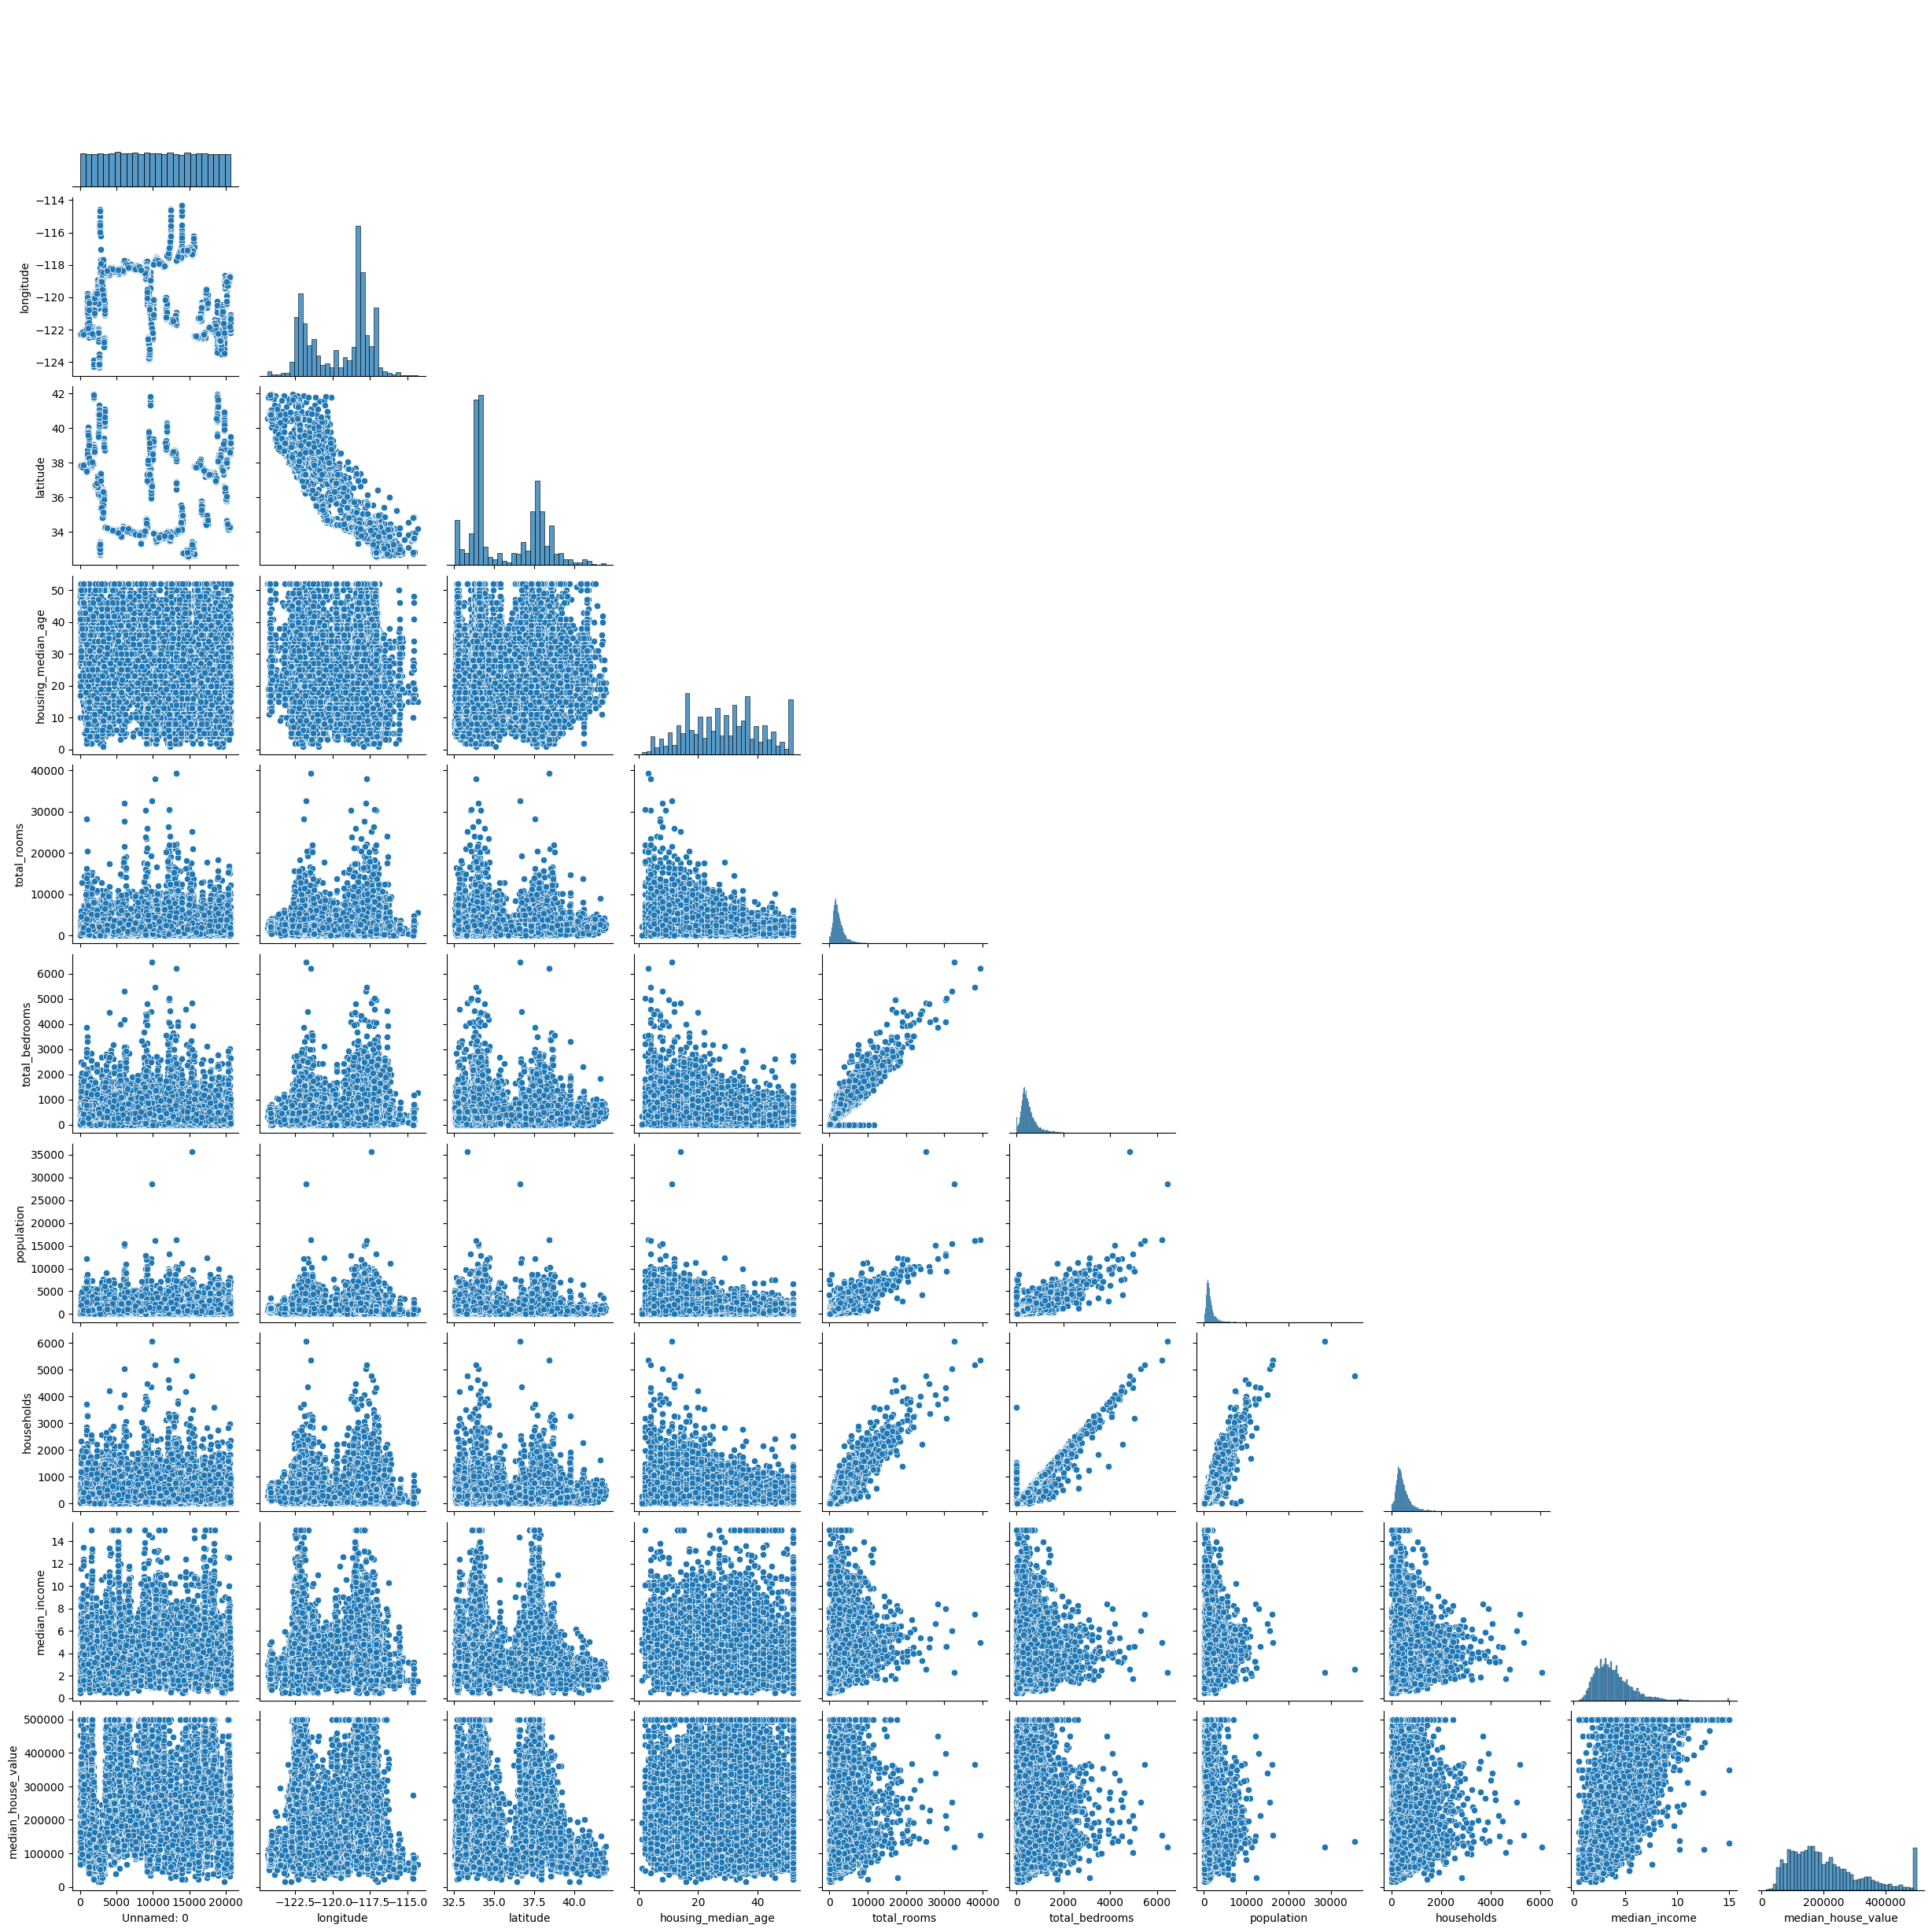

In [9]:
sns.pairplot(immo_df,corner= True)
plt.show()

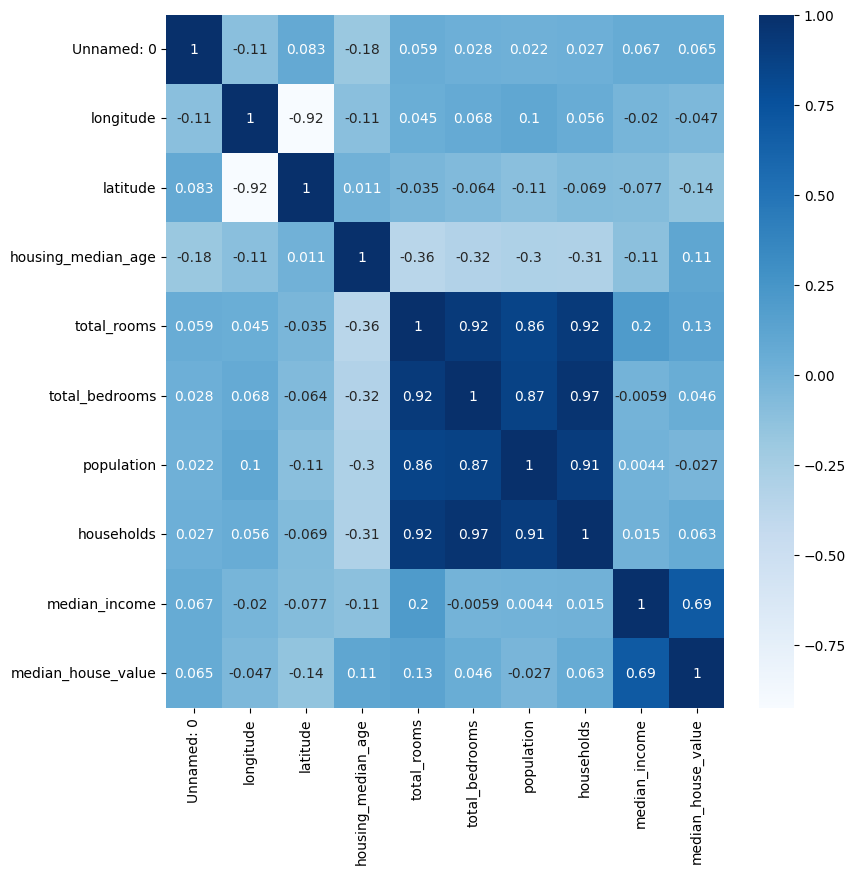

In [10]:
plt.figure(figsize=(9,9))
cor = immo_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [11]:
immo_df

Unnamed: 0  longitude  latitude  housing_median_age  total_rooms  \
0            2072    -119.84     36.77                 6.0       1853.0   
1           10600    -117.80     33.68                 8.0       2032.0   
2            2494    -120.19     36.60                25.0        875.0   
3            4284    -118.32     34.10                31.0        622.0   
4           16541    -121.23     37.79                21.0       1922.0   
...           ...        ...       ...                 ...          ...   
16507        1099    -121.90     39.59                20.0       1465.0   
16508       18898    -122.25     38.11                49.0       2365.0   
16509       11798    -121.22     38.92                19.0       2531.0   
16510        6637    -118.14     34.16                39.0       2776.0   
16511        2575    -124.13     40.80                31.0       2152.0   

       total_bedrooms  population  households  median_income  \
0               473.0      1397.0       417.0         1.4817   
1               349.0       862.0       340.0         6.9133   
2               214.0       931.0       214.0         1.5536   
3               229.0       597.0       227.0         1.5284   
4               373.0      1130.0       372.0         4.0815   
...               ...         ...         ...            ...   
16507           278.0       745.0       250.0         3.0625   
16508           504.0      1131.0       458.0         2.6133   
16509           461.0      1206.0       429.0         4.4958   
16510           840.0      2546.0       773.0         2.5750   
16511           462.0      1259.0       420.0         2.2478   

       median_house_value ocean_proximity  
0                 72000.0          INLAND  
1                274100.0       <1H OCEAN  
2                 58300.0          INLAND  
3                200000.0       <1H OCEAN  
4                117900.0          INLAND  
...                   ...             ...  
16507             93800.0          INLAND  
16508            103100.0        NEAR BAY  
16509            192600.0          INLAND  
16510            153500.0       <1H OCEAN  
16511             81100.0      NEAR OCEAN  

[16512 rows x 11 columns]

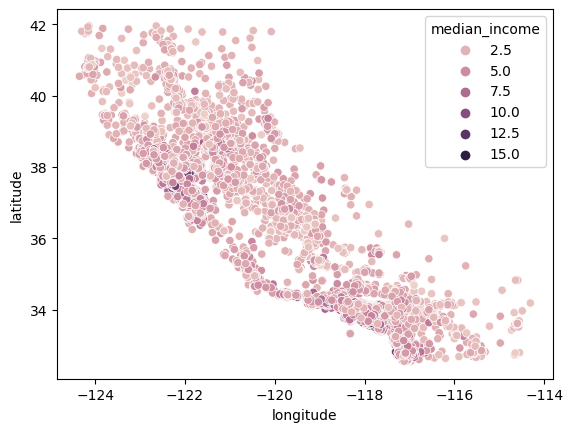

In [12]:
sns.scatterplot(data = immo_df, x = "longitude",y="latitude", hue = "median_income")
plt.show()

In [13]:
immo_df.shape

(16512, 11)

In [14]:
fig = px.scatter_mapbox(immo_df, lat="latitude", lon="longitude", color = "median_house_value",zoom=4.1, mapbox_style="carto-positron")
fig.update_layout(
    showlegend=False,
    font={'size': 15},
    title={'text': '<b>Median house value in California</b>', 'font': {'size': 20}},
    title_x = 0.45,
)
fig.show()

# First iteration : Baseline

In [15]:
first_it = immo_df.to_pickle("data/first_iteration.pkl")

# Second iteration : Normalization

In [16]:
immo_df_without_ocean = immo_df.drop("ocean_proximity",axis=1)
scaler = StandardScaler()
print(scaler.fit(immo_df_without_ocean))
scale_immo = scaler.transform(immo_df_without_ocean)
scale_immo_df = pd.DataFrame(scale_immo,columns=immo_df_without_ocean.columns)
scale_immo_df.head()

StandardScaler()


Unnamed: 0  longitude  latitude  housing_median_age  total_rooms  \
0   -1.384010  -0.137635  0.534564           -1.795939    -0.357368   
1    0.051247   0.879836 -0.909979           -1.637178    -0.276515   
2   -1.312987  -0.312201  0.455091           -0.287715    -0.799127   
3   -1.011731   0.620480 -0.713633            0.188566    -0.913406   
4    1.051114  -0.830911  1.011403           -0.605236    -0.326201   

   total_bedrooms  population  households  median_income  median_house_value  
0       -0.142008   -0.032827   -0.218173      -1.258403           -1.167387  
1       -0.432723   -0.494784   -0.417841       1.610623            0.586611  
2       -0.749228   -0.435204   -0.744572      -1.220425           -1.286288  
3       -0.714061   -0.723603   -0.710862      -1.233736           -0.056493  
4       -0.376456   -0.263373   -0.334862       0.114837           -0.769028

In [17]:
scale_immo_df["ocean_proximity"]= immo_df["ocean_proximity"]
scale_immo_df.head()

Unnamed: 0  longitude  latitude  housing_median_age  total_rooms  \
0   -1.384010  -0.137635  0.534564           -1.795939    -0.357368   
1    0.051247   0.879836 -0.909979           -1.637178    -0.276515   
2   -1.312987  -0.312201  0.455091           -0.287715    -0.799127   
3   -1.011731   0.620480 -0.713633            0.188566    -0.913406   
4    1.051114  -0.830911  1.011403           -0.605236    -0.326201   

   total_bedrooms  population  households  median_income  median_house_value  \
0       -0.142008   -0.032827   -0.218173      -1.258403           -1.167387   
1       -0.432723   -0.494784   -0.417841       1.610623            0.586611   
2       -0.749228   -0.435204   -0.744572      -1.220425           -1.286288   
3       -0.714061   -0.723603   -0.710862      -1.233736           -0.056493   
4       -0.376456   -0.263373   -0.334862       0.114837           -0.769028   

  ocean_proximity  
0          INLAND  
1       <1H OCEAN  
2          INLAND  
3       <1H OCEAN  
4          INLAND

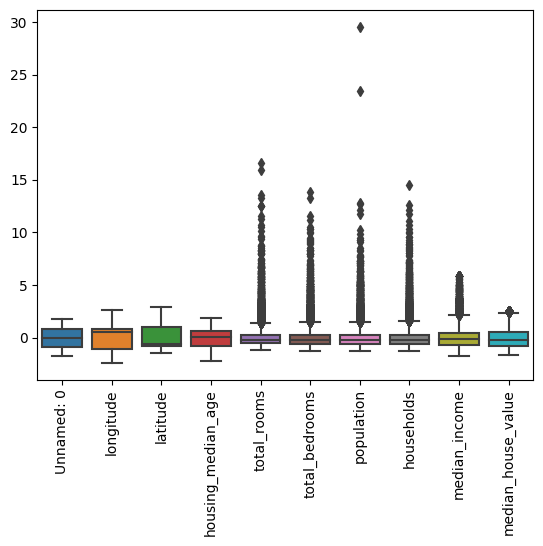

In [18]:
sns.boxplot(data = scale_immo_df)
plt.xticks(rotation=90)
plt.show()

In [19]:
second_it = scale_immo_df.to_pickle("data/second_iteration.pkl")

In [20]:
scale_immo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16512 non-null  float64
 1   longitude           16512 non-null  float64
 2   latitude            16512 non-null  float64
 3   housing_median_age  16512 non-null  float64
 4   total_rooms         16512 non-null  float64
 5   total_bedrooms      16512 non-null  float64
 6   population          16512 non-null  float64
 7   households          16512 non-null  float64
 8   median_income       16512 non-null  float64
 9   median_house_value  16512 non-null  float64
 10  ocean_proximity     16512 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.4+ MB


# Third iteration : Outliers

In [21]:
treshold = 3
scale_immo_without_outliers =scale_immo_df[(np.abs(stats.zscore(scale_immo_df['total_rooms'])) < treshold)] 
scale_immo_without_outliers =scale_immo_without_outliers[(np.abs(stats.zscore(scale_immo_without_outliers['total_bedrooms'])) < treshold)]
scale_immo_without_outliers =scale_immo_without_outliers[(np.abs(stats.zscore(scale_immo_without_outliers['population'])) < treshold)]
scale_immo_without_outliers =scale_immo_without_outliers[(np.abs(stats.zscore(scale_immo_without_outliers['households'])) < treshold)]
scale_immo_without_outliers =scale_immo_without_outliers[(np.abs(stats.zscore(scale_immo_without_outliers['median_income'])) < treshold)]

In [22]:
scale_immo_without_outliers.shape

(15262, 11)

Choix de 3 et pas 2 : vire 2000 de plus

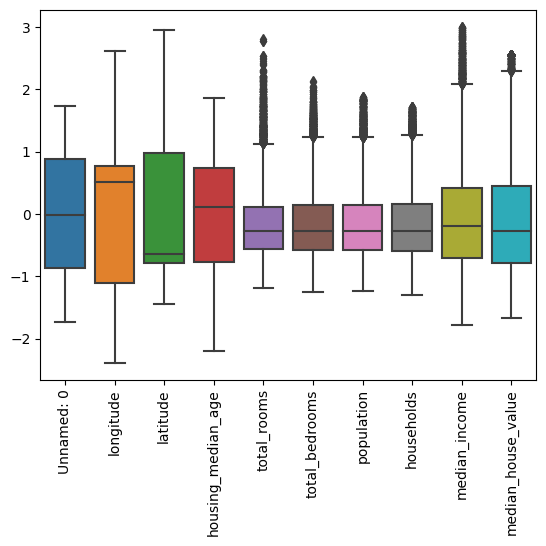

In [23]:
sns.boxplot(data = scale_immo_without_outliers)
plt.xticks(rotation=90)
plt.show()

In [24]:
third_it = scale_immo_without_outliers.to_pickle("data/third_iteration.pkl")

# Fourth iteration : Median imputation

pas concluant sans outliers

In [40]:
scale_immo_df_2 = scale_immo_df
scale_immo_df_3 = scale_immo_df
imputer = SimpleImputer(strategy='median', missing_values=0)
imputer = imputer.fit(scale_immo_df[['total_bedrooms']])
scale_immo_df[['total_bedrooms']] = imputer.transform(scale_immo_df[['total_bedrooms']])

In [26]:
fourth_it = scale_immo_df.to_pickle("data/fourth_iteration.pkl")

# Fifth iteration : Mean imputation

In [27]:
imputer = SimpleImputer(strategy='mean', missing_values=0)
imputer = imputer.fit(scale_immo_df_2[['total_bedrooms']])
scale_immo_df_2[['total_bedrooms']] = imputer.transform(scale_immo_df_2[['total_bedrooms']])

In [28]:
fifth_it = scale_immo_df_2.to_pickle("data/fifth_iteration.pkl")

# Sixth iteration : ocean_proximity encoding

In [29]:
scale_immo_df["ocean_proximity"].value_counts()

<1H OCEAN     7312
INLAND        5235
NEAR OCEAN    2140
NEAR BAY      1821
ISLAND           4
Name: ocean_proximity, dtype: int64

In [30]:
enc = OneHotEncoder(sparse=False).fit(scale_immo_df[["ocean_proximity"]])
encoded = enc.transform(scale_immo_df[["ocean_proximity"]])
encoded_df = pd.DataFrame(encoded, columns=enc.get_feature_names_out())
immo_df_one_hot = pd.concat([scale_immo_df,encoded_df],axis=1)
immo_df_one_hot = immo_df_one_hot.drop("ocean_proximity",axis=1)
immo_df_one_hot

Unnamed: 0  longitude  latitude  housing_median_age  total_rooms  \
0       -1.384010  -0.137635  0.534564           -1.795939    -0.357368   
1        0.051247   0.879836 -0.909979           -1.637178    -0.276515   
2       -1.312987  -0.312201  0.455091           -0.287715    -0.799127   
3       -1.011731   0.620480 -0.713633            0.188566    -0.913406   
4        1.051114  -0.830911  1.011403           -0.605236    -0.326201   
...           ...        ...       ...                 ...          ...   
16507   -1.547765  -1.165080  1.852884           -0.684616    -0.532626   
16508    1.447795  -1.339646  1.161000            1.617410    -0.126100   
16509    0.252870  -0.825923  1.539666           -0.763996    -0.051119   
16510   -0.615723   0.710257 -0.685584            0.823608     0.059547   
16511   -1.299355  -2.277315  2.418547            0.188566    -0.222311   

       total_bedrooms  population  households  median_income  \
0           -0.142008   -0.032827   -0.218173      -1.258403   
1           -0.432723   -0.494784   -0.417841       1.610623   
2           -0.749228   -0.435204   -0.744572      -1.220425   
3           -0.714061   -0.723603   -0.710862      -1.233736   
4           -0.376456   -0.263373   -0.334862       0.114837   
...               ...         ...         ...            ...   
16507       -0.599182   -0.595810   -0.651220      -0.423409   
16508       -0.069329   -0.262510   -0.111856      -0.660681   
16509       -0.170141   -0.197750   -0.187056       0.333675   
16510        0.718417    0.959301    0.704970      -0.680911   
16511       -0.167797   -0.151986   -0.210394      -0.853741   

       median_house_value  ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0               -1.167387                        0.0                     1.0   
1                0.586611                        1.0                     0.0   
2               -1.286288                        0.0                     1.0   
3               -0.056493                        1.0                     0.0   
4               -0.769028                        0.0                     1.0   
...                   ...                        ...                     ...   
16507           -0.978188                        0.0                     1.0   
16508           -0.897475                        0.0                     0.0   
16509           -0.120716                        0.0                     1.0   
16510           -0.460060                        1.0                     0.0   
16511           -1.088410                        0.0                     0.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   
...                       ...                       ...   
16507                     0.0                       0.0   
16508                     0.0                       1.0   
16509                     0.0                       0.0   
16510                     0.0                       0.0   
16511                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN  
0                             0.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0  
...                           ...  
16507                         0.0  
16508                         0.0  
16509                         0.0  
16510                         0.0  
16511                         1.0  

[16512 rows x 15 columns]

In [31]:
sixth_it = immo_df_one_hot.to_pickle("data/sixth_iteration.pkl")

# Seventh iteration : imputation iterative

In [43]:
scale_immo_df_3_1 = pd.concat([scale_immo_df_3,encoded_df],axis=1).drop("ocean_proximity",axis=1)

In [44]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

iter_imp = IterativeImputer(random_state=0)
iter_imputed = iter_imp.fit_transform(scale_immo_df_3_1)
df_iter_imputed = pd.DataFrame(iter_imputed, columns=immo_df_imputative.columns)

In [45]:
seventh_it = df_iter_imputed.to_pickle("data/seventh_iteration.pkl")

# iteration

## Statistics

### Unscaled data

In [ ]:
immo_without_outliers = immo_df[(np.abs(stats.zscore(immo_df['total_rooms'])) < treshold)]
immo_without_outliers = immo_without_outliers[(np.abs(stats.zscore(immo_without_outliers['longitude'])) < treshold)]
immo_without_outliers = immo_without_outliers[(np.abs(stats.zscore(immo_without_outliers['latitude'])) < treshold)]
immo_without_outliers = immo_without_outliers[(np.abs(stats.zscore(immo_without_outliers['housing_median_age'])) < treshold)]
immo_without_outliers = immo_without_outliers[(np.abs(stats.zscore(immo_without_outliers['total_rooms'])) < treshold)]
immo_without_outliers = immo_without_outliers[(np.abs(stats.zscore(immo_without_outliers['total_bedrooms'])) < treshold)]
immo_without_outliers = immo_without_outliers[(np.abs(stats.zscore(immo_without_outliers['population'])) < treshold)]
immo_without_outliers = immo_without_outliers[(np.abs(stats.zscore(immo_without_outliers['households'])) < treshold)]

In [ ]:
best_columns = "+".join(['longitude', 'latitude', 'housing_median_age',"total_rooms","total_bedrooms","population","households","median_income","ocean_proximity"])
model_patsy = ols(f'median_house_value ~ {best_columns}', data=immo_df).fit()

anova_table = sm.stats.anova_lm(model_patsy, typ=2)
anova_table

In [ ]:
# Plot
pplot = sm.ProbPlot(model_patsy.resid, fit = True)
pplot.qqplot(line = 's')
plt.show()

In [ ]:
stats.shapiro(model_patsy.resid)

In [ ]:
shapiro_test = stats.shapiro(immo_df_without_ocean)
shapiro_test

Homogeneity of Variances using Lavene's test
Null Hypothesis(H0) - Homogenous Variance
Alternate Hypothesis(HA) - Non Homogenous variance

- visualisation de données autre 
- catégories pour l'ocean 
- anova
- MI
- Khi 2 
- modèle 
- créer des features

modifier les données en fonction de l'inférence

In [ ]:
# fifth_it = inf_df.to_pickle("data/fifth_iteration.pkl")

# iteration

## Ocean_proximity encoding

In [ ]:
immo_df.shape

In [ ]:
# immo_df = immo_df["ocean_proximity"].replace({})

In [ ]:
# second_it = immo_df.to_pickle("data/second_iteration")